## Load required packages

In [1]:
from keras.models         import Sequential
from keras.layers         import Dense, Dropout, Flatten
from keras.utils.np_utils import to_categorical
from keras.callbacks      import EarlyStopping, Callback
from keras                import backend as K
from keras                import models
from keras                import layers
from keras                import regularizers

import logging
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Using TensorFlow backend.


## Import data

In [2]:
data = np.load('march2014_new.npy')

## Split training and testing data

In [3]:
labels = data[:10000,-1]
labels = to_categorical(labels, 4)

features = data[:10000,:-1]
features = features.astype('float32')

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3,
                                                                           random_state = 1)

In [5]:
x_train = train_features
x_test  = test_features
y_train = train_labels
y_test  = test_labels

In [6]:
# Preprocess the data
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)

In [7]:
x_train.shape

(7000, 20)

In [8]:
x_test.shape

(3000, 20)

In [9]:
y_train.shape

(7000, 4)

In [10]:
y_test.shape

(3000, 4)

## Build deep learning model

In [11]:
K.clear_session()
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(20,),kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
history = model.fit(x_train,
                    y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 7000 samples, validate on 3000 samples
Epoch 1/50
7000/7000 [==============================] - 1s 194us/step - loss: 18.0386 - acc: 0.4586 - val_loss: 13.2598 - val_acc: 0.5917
Epoch 2/50
7000/7000 [==============================] - 1s 116us/step - loss: 10.3492 - acc: 0.5919 - val_loss: 7.4676 - val_acc: 0.6197
Epoch 3/50
7000/7000 [==============================] - 1s 114us/step - loss: 5.8408 - acc: 0.6299 - val_loss: 4.2771 - val_acc: 0.6160
Epoch 4/50
7000/7000 [==============================] - 1s 122us/step - loss: 3.4166 - acc: 0.6290 - val_loss: 2.6154 - val_acc: 0.6380
Epoch 5/50
7000/7000 [==============================] - 1s 123us/step - loss: 2.1871 - acc: 0.6397 - val_loss: 1.8126 - val_acc: 0.6193
Epoch 6/50
7000/7000 [==============================] - 1s 127us/step - loss: 1.5989 - acc: 0.6409 - val_loss: 1.4318 - val_acc: 0.6260
Epoch 7/50
7000/7000 [==============================] - 1s 152us/step - loss: 1.3280 

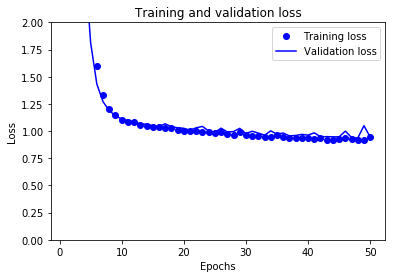

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,2)
plt.legend()
plt.show()

## Calcuate accuracy of prediction

In [14]:
prediction = model.predict_classes(x_test)

In [15]:
prediction

array([1, 2, 0, ..., 3, 1, 1])

In [16]:
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_classes, prediction)

array([[595,  83,  72,   0],
       [267, 473,   6,  19],
       [160,  29, 541,  24],
       [137, 130,  24, 440]])

In [18]:
from sklearn.metrics import accuracy_score
base_score = accuracy_score(y_classes,prediction)
base_score

0.683

In [19]:
y_classes

[1,
 2,
 1,
 2,
 1,
 3,
 0,
 0,
 2,
 1,
 3,
 2,
 2,
 0,
 3,
 0,
 3,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 3,
 3,
 0,
 3,
 0,
 2,
 2,
 3,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 3,
 1,
 2,
 2,
 3,
 0,
 2,
 3,
 3,
 0,
 2,
 3,
 0,
 1,
 0,
 1,
 3,
 2,
 3,
 3,
 2,
 1,
 1,
 1,
 3,
 2,
 2,
 1,
 1,
 3,
 3,
 1,
 3,
 0,
 0,
 3,
 2,
 1,
 3,
 1,
 1,
 2,
 2,
 2,
 3,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 0,
 3,
 1,
 1,
 0,
 1,
 1,
 3,
 2,
 1,
 3,
 2,
 1,
 0,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 3,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 2,
 3,
 0,
 0,
 3,
 1,
 2,
 3,
 2,
 2,
 1,
 3,
 2,
 1,
 1,
 0,
 3,
 3,
 1,
 2,
 2,
 3,
 0,
 2,
 0,
 1,
 1,
 2,
 3,
 2,
 3,
 0,
 1,
 1,
 1,
 3,
 0,
 1,
 0,
 3,
 0,
 3,
 2,
 2,
 0,
 3,
 0,
 3,
 0,
 3,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 3,
 3,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 3,
 1,
 0,
 2,
 3,
 0,
 0,
 1,
 0,
 3,
 2,
 0,
 3,
 0,
 1,
 3,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 0,
 0,
 2,
 3,
 3,
 2,
 3,
 0,
 2,
 0,


## Feature importance

In [20]:
permutation_time = 50
accuracy = np.empty((20, permutation_time))  
for i in range(20):
    x_test_per = x_test.copy()
    for j in range(permutation_time):
        x_test_per[:,i]= np.random.permutation(x_test_per[:,i])
        prediction_per= model.predict_classes(x_test_per)
        accuracy[i,j] = accuracy_score(y_classes,prediction_per)

Text(0, 0.5, 'Accuracy')

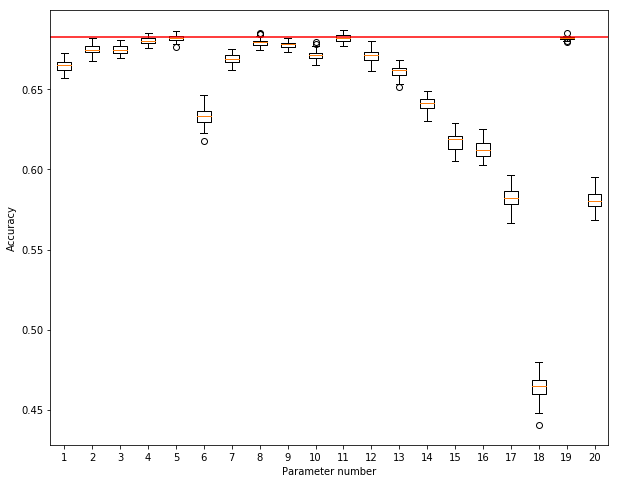

In [21]:
plt.figure(figsize=(10,8))
x = list(range(1,21))
plt.boxplot(np.transpose(accuracy))
plt.axhline(y=base_score, color='r', linestyle='-')
plt.xlabel('Parameter number')
plt.ylabel('Accuracy')

In [48]:
avg_acc = np.mean(accuracy,1)

index = np.argsort(avg_acc)

In [49]:
avg_acc

array([0.66480667, 0.67502667, 0.67511333, 0.68012   , 0.6823    ,
       0.63278   , 0.66901333, 0.67934   , 0.67789333, 0.67127333,
       0.68194   , 0.6708    , 0.66132667, 0.64106   , 0.61718667,
       0.61292667, 0.58263333, 0.46415333, 0.68223333, 0.58060667])

Text(0, 0.5, 'Mean sqaured error')

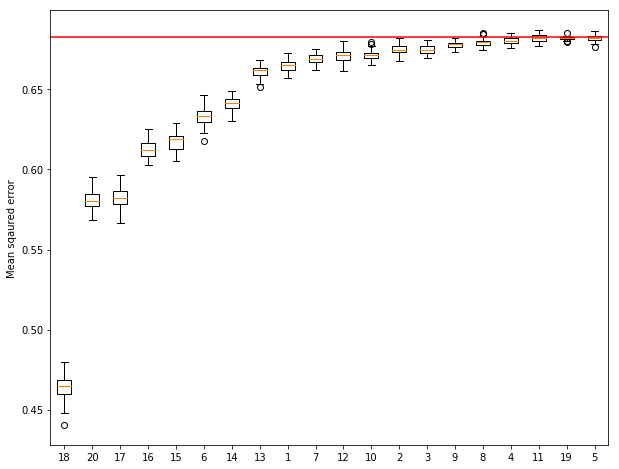

In [51]:
plt.figure(figsize=(10,8))
plt.boxplot(np.transpose(accuracy[index]))
plt.axhline(y=base_score, color='r', linestyle='-')
x = list(range(1,21))
plt.xticks(x, index+1)
plt.ylabel('Mean sqaured error')